# MNIST classifier


## REF

* [모두를 위한 머신러닝/딥러닝 강의](https://hunkim.github.io/ml/)
  - [lab-07-4-mnist_introduction.py](https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-07-4-mnist_introduction.py)
  - [lab-10-1-mnist_softmax.py](https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-10-1-mnist_softmax.py)
* [Tensorflow Official Tutorials](https://www.tensorflow.org/tutorials)
  - [MNIST 초급](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/)
  - [MNIST 고급](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/pros/) 

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [14]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
# parameters
tf.set_random_seed(777)
nb_classes = 10
image_shape = 28 * 28 

learning_rate = 0.02
num_epochs = 201
batch_size = 100
num_iterations = int( mnist.train.num_examples / batch_size )
print( "MNIST training example size: ", mnist.train.num_examples )

MNIST training example size:  55000


In [16]:
X = tf.placeholder( tf.float32, [None, image_shape ])
Y = tf.placeholder( tf.float32, [None, nb_classes ] )

W = tf.Variable( tf.random_normal( [ image_shape, nb_classes ] ) )
b = tf.Variable( tf.random_normal( [ nb_classes ] ) )
H = tf.nn.softmax( tf.matmul(X, W) + b )   # Hypothesis (using softmax)

In [17]:
cost = tf.reduce_mean( -tf.reduce_sum( Y * tf.log( H ), axis=1 ) )
optimizer = tf.train.GradientDescentOptimizer( learning_rate=learning_rate ).minimize( cost )
# train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
sess = tf.Session() 

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run( [ optimizer, cost ], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += cost_val / num_iterations

    if epoch % 10 == 0:
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

print("Learning finished")

Epoch: 0001, Cost: 5.946441277
Epoch: 0011, Cost: 0.959720183
Epoch: 0021, Cost: 0.743450016
Epoch: 0031, Cost: 0.645894626
Epoch: 0041, Cost: 0.585648371
Epoch: 0051, Cost: 0.543468940
Epoch: 0061, Cost: 0.511641595
Epoch: 0071, Cost: 0.486449890
Epoch: 0081, Cost: 0.465602466
Epoch: 0091, Cost: 0.448446723
Epoch: 0101, Cost: 0.433654554
Epoch: 0111, Cost: 0.420973000
Epoch: 0121, Cost: 0.409684491
Epoch: 0131, Cost: 0.399766792
Epoch: 0141, Cost: 0.390865499
Epoch: 0151, Cost: 0.382907256
Epoch: 0161, Cost: 0.375535280
Epoch: 0171, Cost: 0.368941636
Epoch: 0181, Cost: 0.362832275
Epoch: 0191, Cost: 0.357198947
Epoch: 0201, Cost: 0.352077644
Learning finished


In [19]:
is_correct = tf.equal( tf.argmax(H, axis=1), tf.argmax(Y, axis=1) )
accuracy = tf.reduce_mean( tf.cast( is_correct, tf.float32 ) )

print(
    "Accuracy: ",
    accuracy.eval(
        session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
    ),
)

Accuracy:  0.9041


Label:  [6]
Prediction:  [6]


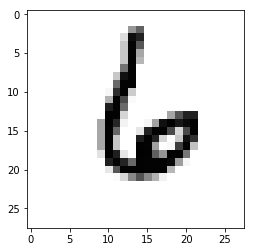

In [20]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax( H, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()

sess.close()